In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

np.set_printoptions(precision=4, suppress=True)

In [24]:
# generate concentric circles
X, y = make_circles(n_samples=500, factor=0.3, noise=0.05)

X.shape
y.shape

# X[:5]
# y[:5]

(500, 2)

(500,)

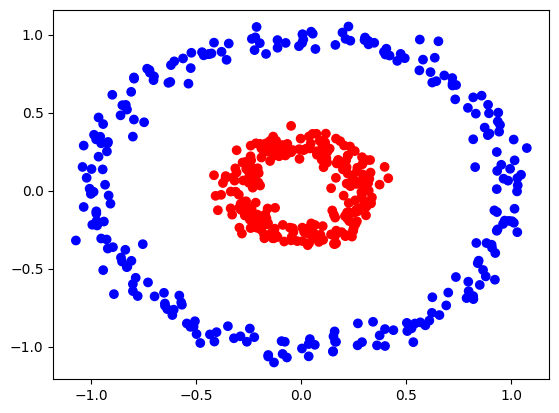

In [25]:
_ = plt.scatter(*X.T, c=y, cmap='bwr')

### Kernel PCA can unwrap the circular structure into a linearly separable form.

In [26]:
from sklearn.decomposition import KernelPCA

In [27]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=5)
X_kpca = kpca.fit_transform(X)
X_kpca.shape

(500, 2)

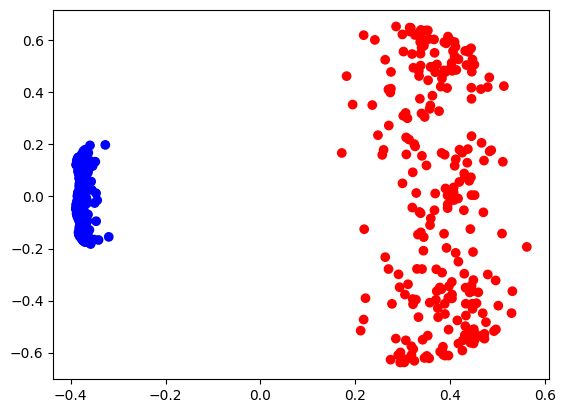

In [28]:
_ = plt.scatter(*X_kpca.T, c=y, cmap='bwr')

# manually doing KPCA

In [29]:
from sklearn.metrics.pairwise import rbf_kernel

K = rbf_kernel(X, gamma=5)
K.shape

(500, 500)

In [30]:
# center the kernel matrix
n = K.shape[0]
one_n = np.ones((n, n)) / n

K = K - one_n @ K - K @ one_n + one_n @ K @ one_n
K.shape

(500, 500)

In [31]:
n_lambdas, betas = np.linalg.eigh(K)
sorted_indices = np.argsort(n_lambdas)[::-1]
n_lambdas = n_lambdas[sorted_indices]
betas = betas[:, sorted_indices]

n_lambdas.shape
betas.shape

(500,)

(500, 500)

In [32]:
(np.cumsum(n_lambdas) / sum(n_lambdas))[:20]
k = np.argmax(np.cumsum(n_lambdas) / sum(n_lambdas) >= 0.99) + 1
k

array([0.1727, 0.2919, 0.4107, 0.4796, 0.548 , 0.6104, 0.6724, 0.7194,
       0.7659, 0.7986, 0.8307, 0.8574, 0.8815, 0.9027, 0.9224, 0.9344,
       0.946 , 0.9525, 0.9586, 0.9642])

np.int64(31)

In [33]:
n_lambdas = n_lambdas[:k]
betas = betas[:, :k]

n_lambdas.shape
betas.shape

(31,)

(500, 31)

In [34]:
alphas = betas / np.sqrt(n_lambdas).reshape(1, -1)
alphas.shape

(500, 31)

In [35]:
coefficients = K @ alphas
coefficients.shape  # n * k

(500, 31)

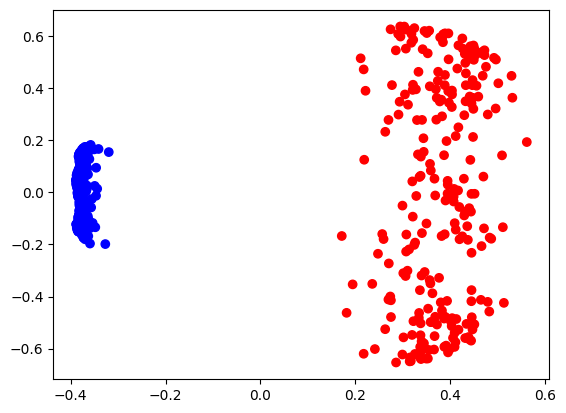

In [36]:
_ = plt.scatter(*coefficients.T[:2], c=y, cmap='bwr')  # plotting coefficients along top 2 PCs